#環境安裝

In [ ]:
!pip install pyserini

     |████████████████████████████████| 84.6 MB 114 kB/s 
     |████████████████████████████████| 13.5 MB 7.9 MB/s 
     |████████████████████████████████| 2.0 MB 32.0 MB/s 
     |████████████████████████████████| 1.2 MB 36.5 MB/s 
     |████████████████████████████████| 4.9 MB 31.0 MB/s 
     |████████████████████████████████| 6.0 MB 34.4 MB/s 
     |████████████████████████████████| 1.1 MB 27.4 MB/s 
     |████████████████████████████████| 3.8 MB 32.8 MB/s 
     |████████████████████████████████| 188 kB 47.8 MB/s 
     |████████████████████████████████| 653 kB 49.2 MB/s 
     |████████████████████████████████| 10.1 MB 36.5 MB/s 
     |████████████████████████████████| 451 kB 48.1 MB/s 
     |████████████████████████████████| 181 kB 48.3 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 596 kB 45.7 MB/s 
     |████████████████████████████████| 6.5 MB 28.9 MB/s 
     |████████████████████████████████| 67 kB 5.3 MB/s 
     |███████████

In [ ]:
!pip install faiss-gpu

     |████████████████████████████████| 85.5 MB 87 kB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd "/content/drive/Shareddrives/中興大學/碩一下/IR/Hank/HW3"

/content/drive/Shareddrives/中興大學/碩一下/IR/Hank/HW3


#資料觀察

In [ ]:
!head -n 30 train.txt

###24491034
BACKGROUND	The emergence of HIV as a chronic condition means that people living with HIV are required to take more responsibility for the self-management of their condition , including making physical , emotional and social adjustments .
BACKGROUND	This paper describes the design and evaluation of Positive Outlook , an online program aiming to enhance the self-management skills of gay men living with HIV .
METHODS	This study is designed as a randomised controlled trial in which men living with HIV in Australia will be assigned to either an intervention group or usual care control group .
METHODS	The intervention group will participate in the online group program ` Positive Outlook ' .
METHODS	The program is based on self-efficacy theory and uses a self-management approach to enhance skills , confidence and abilities to manage the psychosocial issues associated with HIV in daily life .
METHODS	Participants will access the program for a minimum of 90 minutes per week over sev

In [ ]:
path = 'train.txt'
data = []
with open(path) as f:
  for line in f.readlines():
    data.append(line)

In [ ]:
print(len(data))

2593169


In [ ]:
#觀察到有pageID有Label+Sentence
data[0:2]

['###24491034\n',
 'BACKGROUND\tThe emergence of HIV as a chronic condition means that people living with HIV are required to take more responsibility for the self-management of their condition , including making physical , emotional and social adjustments .\n']

#處理 label 與 sentence 我們只需要Sentence

In [ ]:
data[0]

'###24491034\n'

In [ ]:
"###" in data[0]

True

In [ ]:
data[0].replace('###','').replace('\n','')

'24491034'

In [ ]:
data[1]

'BACKGROUND\tThe emergence of HIV as a chronic condition means that people living with HIV are required to take more responsibility for the self-management of their condition , including making physical , emotional and social adjustments .\n'

In [ ]:
#只需要Sentence
label,sentence = data[1].split('\t')
print("label = ",label)
print("sentence = ",sentence)

label =  BACKGROUND
sentence =  The emergence of HIV as a chronic condition means that people living with HIV are required to take more responsibility for the self-management of their condition , including making physical , emotional and social adjustments .



In [ ]:
from tqdm import tqdm
contents = ""
json_file = []

for line in tqdm(data):
  #找Page ID
  if "###" in line:
    pageid = line.replace('###','')
    pageid = pageid.replace('\n','')
  #用空格當作文章的結尾
  if line == '\n':
    page = [pageid,contents]
    json_file.append(page)
    contents = ""
    pageid = ""
  #將Sentence串起來當作一篇文章
  if len(line.split('\t'))  == 2:
    label,sentence = line.split('\t')
    contents += sentence


  

100%|██████████| 2593169/2593169 [00:04<00:00, 589784.15it/s]


In [ ]:
len(json_file)

190654

In [ ]:
print(json_file[0])

['24491034', "The emergence of HIV as a chronic condition means that people living with HIV are required to take more responsibility for the self-management of their condition , including making physical , emotional and social adjustments .\nThis paper describes the design and evaluation of Positive Outlook , an online program aiming to enhance the self-management skills of gay men living with HIV .\nThis study is designed as a randomised controlled trial in which men living with HIV in Australia will be assigned to either an intervention group or usual care control group .\nThe intervention group will participate in the online group program ` Positive Outlook ' .\nThe program is based on self-efficacy theory and uses a self-management approach to enhance skills , confidence and abilities to manage the psychosocial issues associated with HIV in daily life .\nParticipants will access the program for a minimum of 90 minutes per week over seven weeks .\nPrimary outcomes are domain specifi

#將pageid 和 contents 轉成 DataFrame

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(json_file)

In [ ]:
df.columns = ["id", "contents"] 

作業要求格式

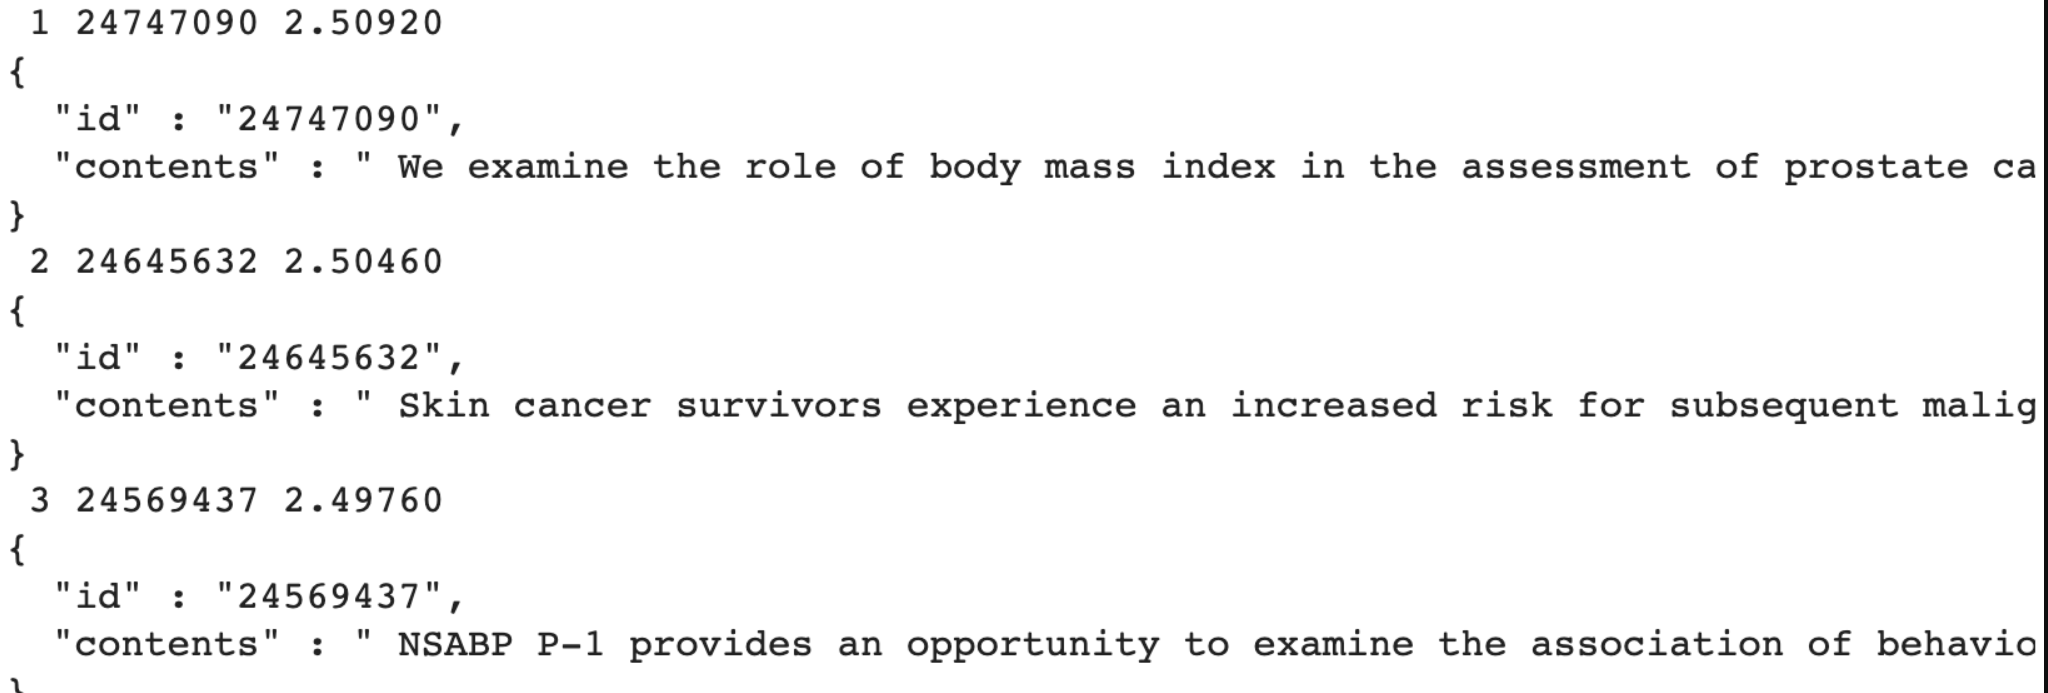

In [ ]:
print(df)

              id                                           contents
0       24491034  The emergence of HIV as a chronic condition me...
1       20497432  The aim of this study was to evaluate the effi...
2       19062107  The aim of this prospective randomized study w...
3       19769482  To explore the effects of GengNianLe ( GNL , a...
4       26077436  Topical formulations of nonsteroidal anti-infl...
...          ...                                                ...
190649  20450359  This study clinically evaluates the 10-year re...
190650  17487114  To compare the quality of real-time sonographi...
190651  22196620  Because the source of protein may play a role ...
190652  25367150  Irregularity measures have been suggested as r...
190653  16042514  Internal medicine residents must be competent ...

[190654 rows x 2 columns]


In [ ]:
len(df)

190654

In [ ]:
import json
data1 = df.to_json('resources/test.json', orient='records')
with open('/content/drive/Shareddrives/中興大學/碩一下/IR/Hank/HW3/resources/test.json', encoding='utf-8') as file:
	data = json.load(file)
print(len(data))

190654


In [ ]:
data[0]

{'contents': "The emergence of HIV as a chronic condition means that people living with HIV are required to take more responsibility for the self-management of their condition , including making physical , emotional and social adjustments .\nThis paper describes the design and evaluation of Positive Outlook , an online program aiming to enhance the self-management skills of gay men living with HIV .\nThis study is designed as a randomised controlled trial in which men living with HIV in Australia will be assigned to either an intervention group or usual care control group .\nThe intervention group will participate in the online group program ` Positive Outlook ' .\nThe program is based on self-efficacy theory and uses a self-management approach to enhance skills , confidence and abilities to manage the psychosocial issues associated with HIV in daily life .\nParticipants will access the program for a minimum of 90 minutes per week over seven weeks .\nPrimary outcomes are domain specifi

#將Json File 轉成 Sparse Indexes
input resource : 把JsonFile 存至 resources 資料夾下面 為InputFile


index sample_collection_jsonl : Output File放置 sample_collection_jsonl 資料夾下面

其他程式碼皆為預設參數

程式參考: https://github.com/castorini/pyserini#how-do-i-index-and-search-my-own-documents

In [ ]:
!python -m pyserini.index.lucene \
  --collection JsonCollection \
  --input resources \
  --index sample_collection_jsonl \
  --generator DefaultLuceneDocumentGenerator \
  --threads 1 \
  --storePositions --storeDocvectors --storeRaw

2022-03-16 07:55:55,855 INFO  [main] index.IndexCollection (IndexCollection.java:643) - Setting log level to INFO
2022-03-16 07:55:55,861 INFO  [main] index.IndexCollection (IndexCollection.java:646) - Starting indexer...
2022-03-16 07:55:55,861 INFO  [main] index.IndexCollection (IndexCollection.java:647) - ============ Loading Parameters ============
2022-03-16 07:55:55,863 INFO  [main] index.IndexCollection (IndexCollection.java:648) - DocumentCollection path: resources
2022-03-16 07:55:55,864 INFO  [main] index.IndexCollection (IndexCollection.java:649) - CollectionClass: JsonCollection
2022-03-16 07:55:55,865 INFO  [main] index.IndexCollection (IndexCollection.java:650) - Generator: DefaultLuceneDocumentGenerator
2022-03-16 07:55:55,867 INFO  [main] index.IndexCollection (IndexCollection.java:651) - Threads: 1
2022-03-16 07:55:55,869 INFO  [main] index.IndexCollection (IndexCollection.java:652) - Language: en
2022-03-16 07:55:55,870 INFO  [main] index.IndexCollection (IndexCollect

#pyserini 實作 passage ranking task

In [ ]:
from pyserini.search.lucene import LuceneSearcher

searcher = LuceneSearcher('sample_collection_jsonl')
hits = searcher.search('cancer')

In [ ]:
#Hits 會 紀錄分數最高的前幾筆Document 與 Score
print("Rank  PageID  Score")
for i in range(len(hits)):
    print(f'{i+1:4} {hits[i].docid:8} {hits[i].score:.5f}')

Rank  PageID  Score
   1 24747090 2.50920
   2 24645632 2.50460
   3 24569437 2.49760
   4 20859673 2.49170
   5 7752269  2.48950
   6 25017249 2.48910
   7 23448100 2.48700
   8 10214599 2.48430
   9 23694983 2.48430
  10 25008853 2.47790


In [ ]:
#Show Top10 Result
for i in range(len(hits)):
  print(f'{i+1:2} {hits[i].docid:4} {hits[i].score:.5f}')
  doc = searcher.doc(hits[i].docid)
  print(doc.raw())

 1 24747090 2.50920
{
  "id" : "24747090",
  "contents" : "We examine the role of body mass index in the assessment of prostate cancer risk .\nA total of 3,258 participants who underwent biopsy ( including 1,902 men with a diagnosis of prostate cancer ) were identified from the Selenium and Vitamin E Cancer Prevention Trial .\nThe associations of body mass index with prostate cancer and high grade prostate cancer were examined using logistic regression , adjusting for age , race , body mass index adjusted prostate specific antigen , digital rectal examination , family history of prostate cancer , biopsy history , prostate specific antigen velocity , and time between study entry and the last biopsy .\nThe prediction models were compared with our previously developed body mass index adjusted Prostate Cancer Prevention Trial prostate cancer risk calculator .\nOf the study subjects 49.1 % were overweight and 29.3 % were obese .\nAfter adjustment , among men without a known family history o

#Linear Search

In [ ]:
search_word = "cancer"
result = []
for pageid,context in json_file:
  if search_word in context:
    result.append([pageid,context])
#暴力搜尋會找所有有包含搜尋字的文章 搜尋時間也較長 搜尋到的文章內容參差不齊 有大量參考性不高的文章
print(len(result))

13460


#比較時間

In [ ]:
import time

##反向索引表時間
pyserini_start = time.time()
hits = searcher.search('cancer')
pyserini_end = time.time()
invert_time = pyserini_end - pyserini_start
print("反向索引時間 : ",invert_time)


##暴力搜尋時間
search_word = "cancer"
result = []
linear_start = time.time()
for pageid,context in json_file:
  if search_word in context:
    result.append([pageid,context])
linear_end = time.time()
linear_time = linear_end - linear_start
print("暴力搜尋時間 : ",linear_time)

print("相差時間 : ",linear_time - invert_time)


反向索引時間 :  0.00872945785522461
暴力搜尋時間 :  0.34555625915527344
相差時間 :  0.33682680130004883
